<a href="https://colab.research.google.com/github/dtngx/BDA/blob/main/BDA_Assingment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BDA Assignment 2

## Preparation

In [ ]:
#open the working directory by attaching a google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#installing jdk, spark and pyspark 
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop2.7.tgz
!tar -xvf spark-3.1.1-bin-hadoop2.7.tgz
!pip install -q findspark
!pip install pyspark

spark-3.1.1-bin-hadoop2.7/
spark-3.1.1-bin-hadoop2.7/NOTICE
spark-3.1.1-bin-hadoop2.7/kubernetes/
spark-3.1.1-bin-hadoop2.7/kubernetes/tests/
spark-3.1.1-bin-hadoop2.7/kubernetes/tests/python_executable_check.py
spark-3.1.1-bin-hadoop2.7/kubernetes/tests/autoscale.py
spark-3.1.1-bin-hadoop2.7/kubernetes/tests/worker_memory_check.py
spark-3.1.1-bin-hadoop2.7/kubernetes/tests/py_container_checks.py
spark-3.1.1-bin-hadoop2.7/kubernetes/tests/decommissioning.py
spark-3.1.1-bin-hadoop2.7/kubernetes/tests/pyfiles.py
spark-3.1.1-bin-hadoop2.7/kubernetes/tests/decommissioning_cleanup.py
spark-3.1.1-bin-hadoop2.7/kubernetes/dockerfiles/
spark-3.1.1-bin-hadoop2.7/kubernetes/dockerfiles/spark/
spark-3.1.1-bin-hadoop2.7/kubernetes/dockerfiles/spark/decom.sh
spark-3.1.1-bin-hadoop2.7/kubernetes/dockerfiles/spark/entrypoint.sh
spark-3.1.1-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/
spark-3.1.1-bin-hadoop2.7/kubernetes/dockerfiles/spark/bindings/R/
spark-3.1.1-bin-hadoop2.7/kubernetes/docker

In [ ]:
#setting up environment variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop2.7"

In [ ]:
#setting up pyspark and other prerequisites
import findspark
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
findspark.init()
from pyspark.sql import SparkSession
#creating the spark session
spark = SparkSession.builder.master("local[*]").getOrCreate()
# verify that Spark is running
print("The created SparkSession object:", spark)
print("Spark version:",spark.version)

The created SparkSession object: <pyspark.sql.session.SparkSession object at 0x7f67f871d3d0>
Spark version: 3.1.1


## Part I
### 1. Load the Dataframe

In [ ]:
file_path = "/content/drive/MyDrive/BDA_A2/Medical_info.csv"
file_schema = "id LONG, age INT, BMI DOUBLE, PSA DOUBLE, TG DOUBLE,  Cholesterol DOUBLE, LDLChole DOUBLE, HDLChole DOUBLE, Glucose DOUBLE, Testosterone DOUBLE , BP_1 INT"

#loading the dataframe from the csv file
df = spark.read.csv(file_path, header=True, schema=file_schema)

#printing the actually loaded schema
df.printSchema()
#showing the first 20 rows of the loaded spark dataframe
df.show()
#calculating the total number of observations(rows) in the dataframe
print("Total number of rows:", df.count())

root
 |-- id: long (nullable = true)
 |-- age: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- PSA: double (nullable = true)
 |-- TG: double (nullable = true)
 |-- Cholesterol: double (nullable = true)
 |-- LDLChole: double (nullable = true)
 |-- HDLChole: double (nullable = true)
 |-- Glucose: double (nullable = true)
 |-- Testosterone: double (nullable = true)
 |-- BP_1: integer (nullable = true)

+--------+---+------+----+-----+-----------+--------+--------+-------+------------+----+
|      id|age|   BMI| PSA|   TG|Cholesterol|LDLChole|HDLChole|Glucose|Testosterone|BP_1|
+--------+---+------+----+-----+-----------+--------+--------+-------+------------+----+
|19782173| 59|28.378|0.34|204.0|      196.0|   132.0|    49.0|   92.0|         7.7|   1|
|32613511| 59|24.968| 1.0|147.0|      181.0|   129.0|    34.0|   96.0|        4.09|   1|
|32723850| 48|31.307|0.62|155.0|      185.0|   127.0|    41.0|  139.0|         4.5|   1|
|22913531| 47|27.837|0.38|488.0|      254.0| 

The Medical_info DataFrame has a shape of (6967,11) So it has the id collumn, 10 feature collumns (age, BMI, PSA, TG, Cholesterol, LDLChole, HDLChole, Glucose, Testosterone, BP_1).
It consists of 6967 rows (observations).

### 2. Create a new DataFrame without the null/missing values 

In [ ]:
#count before drop
print("Count of rows: ", df.count())
#replacing the zeroes with numpy NaN objects
df = df.replace(0, np.nan)
#dropping the rows which have a NaN
df_dropped = df.dropna()
#count after drop
print("Shape of the dataframe after the drop: ", df_dropped.count())


Count of rows:  6967
Shape of the dataframe after the drop:  6907


In [ ]:
#calculating number of dropped rows:
print("All in all", df.count()-df_dropped.count(), "rows were dropped.\nThere are", df_dropped.count(), "rows left in the dataframe.")

All in all 60 rows were dropped.
There are 6907 rows left in the dataframe.


### 3. Summary statistics of the 'age' feature, histogram for the 'age' feature


In [ ]:
#converting to pandas dataframe
pd_df = df_dropped.toPandas()
#printing statistics of the 'age' column
print(pd_df["age"].describe())
#calculating the variance of the 'age' feature
print("Variance of age column ", pd_df["age"].var())

count    6907.000000
mean       53.341538
std         8.711644
min        21.000000
25%        48.000000
50%        53.000000
75%        59.000000
max        90.000000
Name: age, dtype: float64
Variance of age column  75.89274730249846


Text(0.5, 1.0, 'Histogram of "age" column')

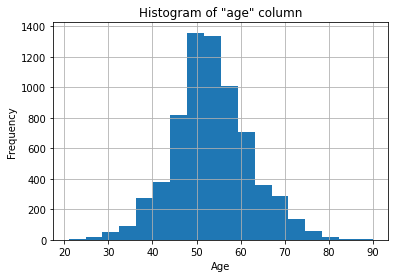

In [ ]:

# plotting the histogram of the age 
pd_df.hist(column = "age", bins=18)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of "age" column')

### 4. Display the quartile Information of the "BMI" feature

In [ ]:
#printing the statistics f the 'BMI' column
print(pd_df["BMI"].describe())

count    6907.000000
mean       24.762561
std         2.803643
min        13.747000
25%        22.975500
50%        24.705000
75%        26.435000
max        43.261000
Name: BMI, dtype: float64


Text(0.5, 1.0, 'BMI Boxplot')

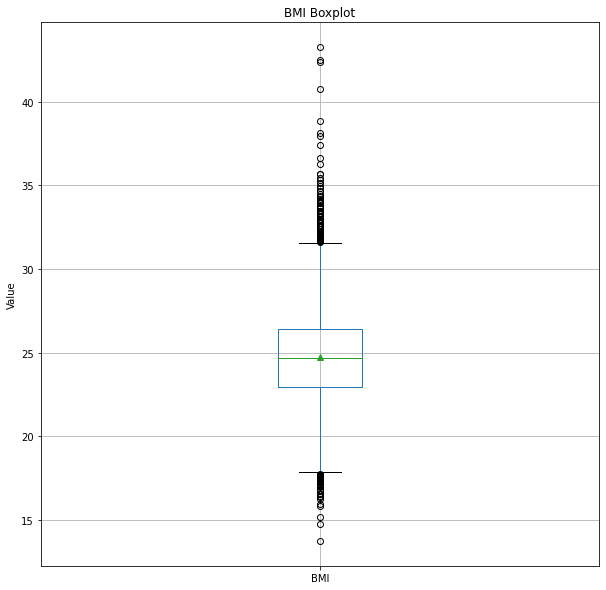

In [ ]:
#generating the boxplot
pd_df.boxplot("BMI", showmeans=True, figsize=(10,10))
#annotating the plot
plt.ylabel('Value')
plt.title('BMI Boxplot')

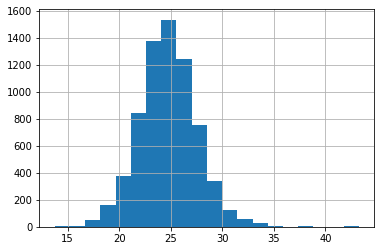

In [ ]:
pd_df['BMI'].hist(bins=20)

### 5. Use Spark DataFrame API to count the number of rows where 'age' is greater than 50 and 'BP_1' equals 1

In [ ]:
import pyspark.sql.functions as f

filter_50_BP1 = df_dropped.filter((f.col("age")>50) & (f.col("BP_1")==1))

print("There are", filter_50_BP1.count(), "rows where age > 50 and BP_1 equals 1.")

There are 2165 rows where age > 50 and BP_1 equals 1.


### 6. Build to classification models with 'BP_1' as target label and evaluate the performance

#### A

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import VectorAssembler

# transforming BP_1 to 0 for low and 1 for high Blood Pressure
df_dropped = df_dropped.withColumn('label', (df_dropped.BP_1== 2).cast('integer'))

#set up of the VectorAssembler
VecAss = VectorAssembler(inputCols=[
 'age', 'BMI', 'PSA', 'TG', 'Cholesterol', 'LDLChole', 'HDLChole', 'Glucose', 'Testosterone'
], outputCol='features')

#assembling features
assembled_df = VecAss.transform(df_dropped)

#printing the first ten rows pf only predictor features and outcome column
assembled_df.select("features", "label").show(10, truncate=False)

+---------------------------------------------------+-----+
|features                                           |label|
+---------------------------------------------------+-----+
|[59.0,28.378,0.34,204.0,196.0,132.0,49.0,92.0,7.7] |0    |
|[59.0,24.968,1.0,147.0,181.0,129.0,34.0,96.0,4.09] |0    |
|[48.0,31.307,0.62,155.0,185.0,127.0,41.0,139.0,4.5]|0    |
|[47.0,27.837,0.38,488.0,254.0,158.0,55.0,250.0,5.3]|1    |
|[55.0,22.662,0.49,87.0,175.0,120.0,44.0,99.0,6.9]  |0    |
|[68.0,23.985,1.2,96.0,193.0,135.0,48.0,125.0,7.9]  |1    |
|[58.0,22.096,0.09,70.0,200.0,133.0,60.0,154.0,7.0] |1    |
|[48.0,28.577,0.12,139.0,151.0,95.0,37.0,102.0,5.6] |0    |
|[53.0,27.253,1.3,93.0,151.0,91.0,55.0,100.0,9.19]  |1    |
|[57.0,30.538,5.1,194.0,250.0,178.0,51.0,93.0,13.5] |1    |
+---------------------------------------------------+-----+
only showing top 10 rows



In [ ]:
#Splitting the data
data_train, data_test = assembled_df.randomSplit([0.7, 0.3], seed=42)

#creating and running the decision tree classifier
dtc = DecisionTreeClassifier(featuresCol='features', labelCol='label', maxDepth=3, maxBins=16).fit(data_train)

#testing the trained classifier
dtc_prediction = dtc.transform(data_test)
dtc_prediction.select("features", "label", "prediction").show(10, truncate=False)

+---------------------------------------------------+-----+----------+
|features                                           |label|prediction|
+---------------------------------------------------+-----+----------+
|[65.0,24.007,0.12,75.0,141.0,89.0,52.0,100.0,2.29] |1    |1.0       |
|[59.0,29.997,1.7,134.0,136.0,81.0,33.0,102.0,3.6]  |1    |1.0       |
|[38.0,31.427,0.29,177.0,219.0,158.0,40.0,100.0,4.5]|1    |1.0       |
|[57.0,27.278,2.3,140.0,174.0,120.0,33.0,108.0,5.8] |1    |1.0       |
|[78.0,21.43,1.6,117.0,153.0,99.0,40.0,96.0,1.7]    |1    |1.0       |
|[49.0,25.0,0.22,115.0,200.0,132.0,45.0,116.0,3.3]  |0    |0.0       |
|[51.0,22.791,0.8,71.0,195.0,118.0,54.0,87.0,4.0]   |1    |0.0       |
|[56.0,23.668,0.89,151.0,203.0,138.0,59.0,96.0,4.0] |1    |0.0       |
|[72.0,23.395,1.2,81.0,212.0,146.0,62.0,104.0,3.9]  |0    |1.0       |
|[48.0,23.26,1.3,132.0,159.0,104.0,46.0,86.0,4.4]   |0    |0.0       |
+---------------------------------------------------+-----+----------+
only s

In [ ]:
# GBT classification
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(labelCol='label', maxDepth=5, maxBins=16, maxIter=10).fit(data_train)

# testing the trained classifier
gbt_prediction = gbt.transform(data_test)
gbt_prediction.select("features", "label", "prediction").show(10, truncate=False)

+---------------------------------------------------+-----+----------+
|features                                           |label|prediction|
+---------------------------------------------------+-----+----------+
|[65.0,24.007,0.12,75.0,141.0,89.0,52.0,100.0,2.29] |1    |1.0       |
|[59.0,29.997,1.7,134.0,136.0,81.0,33.0,102.0,3.6]  |1    |1.0       |
|[38.0,31.427,0.29,177.0,219.0,158.0,40.0,100.0,4.5]|1    |0.0       |
|[57.0,27.278,2.3,140.0,174.0,120.0,33.0,108.0,5.8] |1    |1.0       |
|[78.0,21.43,1.6,117.0,153.0,99.0,40.0,96.0,1.7]    |1    |1.0       |
|[49.0,25.0,0.22,115.0,200.0,132.0,45.0,116.0,3.3]  |0    |1.0       |
|[51.0,22.791,0.8,71.0,195.0,118.0,54.0,87.0,4.0]   |1    |0.0       |
|[56.0,23.668,0.89,151.0,203.0,138.0,59.0,96.0,4.0] |1    |0.0       |
|[72.0,23.395,1.2,81.0,212.0,146.0,62.0,104.0,3.9]  |0    |0.0       |
|[48.0,23.26,1.3,132.0,159.0,104.0,46.0,86.0,4.4]   |0    |0.0       |
+---------------------------------------------------+-----+----------+
only s

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

BinEval = BinaryClassificationEvaluator()

# scores of the two classifiers
print("Score for Decision Tree Classifier", BinEval.evaluate(dtc_prediction))
print("Score for Gradient Boost Tree", BinEval.evaluate(gbt_prediction))



Score for Decision Tree Classifier 0.5655838491255765
Score for Gradient Boost Tree 0.6741037677065599


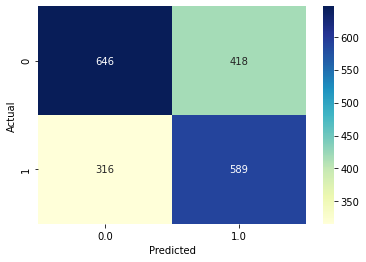

Decision Tree Model
Accuracy: 0.63
Precision:  0.48
Recall:   0.65


In [ ]:
import seaborn as sns

# Confusion Matrices
# Decision Tree Classifier

df_dtc = dtc_prediction.toPandas()
conf_mat_dtc = pd.crosstab(df_dtc['label'], df_dtc['prediction'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(conf_mat_dtc, annot=True, fmt=".0f", cmap='YlGnBu')
plt.show()

#needs to be rewritten... don't know how to get numbers of heatmap yet.
# True Negative
TN = dtc_prediction.filter('prediction = 0 AND label = prediction').count()
# True Positive
TP = dtc_prediction.filter('prediction = 1 AND label = prediction').count()
# False Negative 
FN = dtc_prediction.filter('prediction = 0 AND label != prediction').count()
# False Positive
FP = dtc_prediction.filter('prediction = 1 AND label != prediction').count()
 
# The accuracy is the ratio of correct predictions (TP and TN) to all predictions (TP, TN, FP and FN)
accuracy = (TN + TP) / (TN + TP + FN + FP)
 
#precise
precise = TP/(TP+TN)
 
#recall
recall = TP/(TP + FN)
print("Decision Tree Model\nAccuracy: {:.2f}\nPrecision:  {:.2f}\nRecall:   {:.2f}"\
      .format(accuracy, precise, recall))

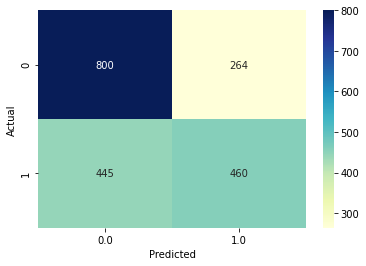

Gradient Boost Tree Model
Accuracy: 0.64
Precision:  0.37
Recall:   0.51


In [ ]:
# Confusion Matrices
# Gradient Boost Tree Classifier

df_gbt = gbt_prediction.toPandas()
conf_mat_gbt = pd.crosstab(df_gbt['label'], df_gbt['prediction'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(conf_mat_gbt, annot=True, fmt=".0f", cmap='YlGnBu')
plt.show()

#needs to be rewritten... don't know how to get numbers of heatmap yet.
# True Negative
TN = gbt_prediction.filter('prediction = 0 AND label = prediction').count()
# True Positive
TP = gbt_prediction.filter('prediction = 1 AND label = prediction').count()
# False Negative 
FN = gbt_prediction.filter('prediction = 0 AND label != prediction').count()
# False Positive
FP = gbt_prediction.filter('prediction = 1 AND label != prediction').count()
 
# The accuracy is the ratio of correct predictions (TP and TN) to all predictions (TP, TN, FP and FN)
accuracy = (TN + TP) / (TN + TP + FN + FP)
 
#precise
precise = TP/(TP+TN)
 
#recall
recall = TP/(TP + FN)
print("Gradient Boost Tree Model\nAccuracy: {:.2f}\nPrecision:  {:.2f}\nRecall:   {:.2f}"\
      .format(accuracy, precise, recall))


## Part II
### 1. Load the Dataframe

In [ ]:
file_path = "/content/drive/MyDrive/BDA_A2/Region_info.csv"
df = spark.read.csv(file_path, header=True, schema= "population DOUBLE, fertility DOUBLE, HIV DOUBLE, CO2 DOUBLE, BMI_male DOUBLE, GDP DOUBLE, BMI_female DOUBLE, life DOUBLE, child_mortality DOUBLE, region STRING")

df.printSchema()
df.show(truncate=False)
print("Total number of rows:", df.count())

root
 |-- population: double (nullable = true)
 |-- fertility: double (nullable = true)
 |-- HIV: double (nullable = true)
 |-- CO2: double (nullable = true)
 |-- BMI_male: double (nullable = true)
 |-- GDP: double (nullable = true)
 |-- BMI_female: double (nullable = true)
 |-- life: double (nullable = true)
 |-- child_mortality: double (nullable = true)
 |-- region: string (nullable = true)

+------------+---------+----+-------------------+------------------+-------+----------+----+---------------+--------------------------+
|population  |fertility|HIV |CO2                |BMI_male          |GDP    |BMI_female|life|child_mortality|region                    |
+------------+---------+----+-------------------+------------------+-------+----------+----+---------------+--------------------------+
|3.4811059E7 |2.73     |0.1 |3.328944661018629  |24.5962           |12314.0|129.9049  |75.3|29.5           |Middle East & North Africa|
|1.9842251E7 |6.43     |2.0 |1.4743533878509398 |22.25083  

### 2. Create the second dataframe with 'region' column dropped

In [ ]:
df_dropped = df.drop("region")
df_dropped.show(truncate=False)

+------------+---------+----+-------------------+------------------+-------+----------+----+---------------+
|population  |fertility|HIV |CO2                |BMI_male          |GDP    |BMI_female|life|child_mortality|
+------------+---------+----+-------------------+------------------+-------+----------+----+---------------+
|3.4811059E7 |2.73     |0.1 |3.328944661018629  |24.5962           |12314.0|129.9049  |75.3|29.5           |
|1.9842251E7 |6.43     |2.0 |1.4743533878509398 |22.25083          |7103.0 |130.1247  |58.3|192.0          |
|4.038186E7  |2.24     |0.5 |4.78516998252535   |27.5017           |14646.0|118.8915  |75.5|15.4           |
|2975029.0   |1.4      |0.1 |1.8041062172001    |25.35542          |7383.0 |132.8108  |72.5|20.0           |
|2.1370348E7 |1.96     |0.1 |18.0163132681972   |27.56373          |41312.0|117.3755  |81.5|5.2            |
|8331465.0   |1.41     |0.3 |8.18316001754696   |26.46741          |43952.0|124.1394  |80.4|4.6            |
|8868713.0   |1.99 

### 3. Visualising the relationship betweeen 'fertility' and 'life' features

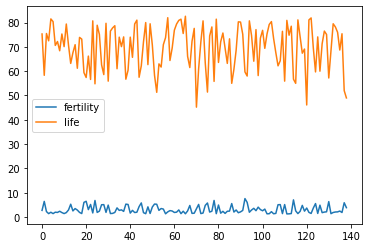

In [ ]:
#lineplot to get an idea about the data
df_dropped.select('fertility', 'life').toPandas().plot()


Text(0.5, 1.0, 'Relationship between fertility and life expectancy')

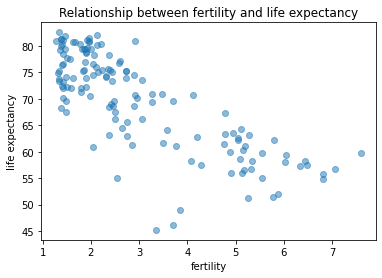

In [ ]:
#scatterplot so see the tendency, that the lower the fertility, the higher the life expectancy
plt.scatter(df_dropped.select('fertility').toPandas(), df_dropped.select('life').toPandas(), alpha=0.5)
plt.xlabel('fertility')
plt.ylabel('life expectancy')
plt.title('Relationship between fertility and life expectancy')

### 4. Using Spark SQL query the dtataframe where fertility is greater than 1.0 and life is greater than 70

In [ ]:
# Create a temporary table 
df_dropped.createOrReplaceTempView("region")
#building the sql query
query = "SELECT * FROM region WHERE fertility>1.0 AND life>70"

#running the sql query
flt = spark.sql(query)

print("There are", flt.count(), "rows where fertility > 1.0 and life > 70.")

flt.show()

There are 78 rows where fertility > 1.0 and life > 70.
+------------+---------+----+------------------+------------------+-------+----------+----+---------------+
|  population|fertility| HIV|               CO2|          BMI_male|    GDP|BMI_female|life|child_mortality|
+------------+---------+----+------------------+------------------+-------+----------+----+---------------+
| 3.4811059E7|     2.73| 0.1| 3.328944661018629|           24.5962|12314.0|  129.9049|75.3|           29.5|
|  4.038186E7|     2.24| 0.5|  4.78516998252535|           27.5017|14646.0|  118.8915|75.5|           15.4|
|   2975029.0|      1.4| 0.1|   1.8041062172001|          25.35542| 7383.0|  132.8108|72.5|           20.0|
| 2.1370348E7|     1.96| 0.1|  18.0163132681972|          27.56373|41312.0|  117.3755|81.5|            5.2|
|   8331465.0|     1.41| 0.3|  8.18316001754696|          26.46741|43952.0|  124.1394|80.4|            4.6|
|   8868713.0|     1.99| 0.1|  5.10953829181389|          25.65117|14365.0|  128.

### 5. Building a Linear Regression Model to predict life expectancy based on fertility 

In [ ]:
#preparation for linear regression, feature assembly
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

#assembling the feature vectors
VecAss = VectorAssembler(inputCols=['fertility'], outputCol='features') 
df_assembled = VecAss.transform(df_dropped)

#setting up the linear regressor
lr = LinearRegression(featuresCol='features', labelCol='life',maxIter=10)

#splitting the data
(df_train, df_test) = df_assembled.randomSplit([0.8, 0.2])

#training the model
lr_model = lr.fit(df_train)

In [ ]:
#checking the stats. with a standard deviation of around 9.12 the RMSE of 5.82 is quite good.
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

df_dropped.select(['life']).describe().show()

RMSE: 5.829036
r2: 0.609171
+-------+-----------------+
|summary|             life|
+-------+-----------------+
|  count|              139|
|   mean|69.60287769784175|
| stddev|9.122189401943691|
|    min|             45.2|
|    max|             82.6|
+-------+-----------------+



In [ ]:
#evaluation using the testing data and calculating the RMSE
test_result = lr_model.evaluate(df_test)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 4.68335


In [ ]:
#making predictions and evaluating
lr_predictions = lr_model.transform(df_test)
lr_predictions.select("prediction","life","features").show(5)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="life",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+-----------------+----+--------+
|       prediction|life|features|
+-----------------+----+--------+
|74.65289031714732|72.2|  [1.89]|
|76.92036762111263|81.4|  [1.38]|
|70.87376147720512|63.0|  [2.74]|
|70.87376147720512|65.7|  [2.74]|
|76.03116083524388|72.1|  [1.58]|
+-----------------+----+--------+
only showing top 5 rows

R Squared (R2) on test data = 0.664761


### 6. Lasso Regression for 'life' using all other columns as predictor

In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
#preparing the data
VecAss = VectorAssembler(inputCols=['population', 'fertility', 'HIV', 
                                    'CO2', 'BMI_male', 'GDP', 
                                    'BMI_female', 'child_mortality'], outputCol='features') 
df_assembled = VecAss.transform(df_dropped)

#preparing the regressor (elasticNetParam = 1 for Lasso Regression)
lr = LinearRegression(featuresCol='features', labelCol='life',maxIter=10, elasticNetParam=1, regParam=0.1)
#splitting the data
(df_train, df_test) = df_assembled.randomSplit([0.7, 0.3])
#training the model
lr_model = lr.fit(df_train)

In [ ]:
#checking the stats. with a standard deviation of around 9.01 the RMSE of 3.01 is very good.
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

df_train.select(['life']).describe().show()

RMSE: 2.525198
r2: 0.918562
+-------+-----------------+
|summary|             life|
+-------+-----------------+
|  count|              105|
|   mean|69.73047619047617|
| stddev|8.891170250586162|
|    min|             45.2|
|    max|             82.0|
+-------+-----------------+



In [ ]:
#making predictions and evaluating
lr_predictions = lr_model.transform(df_test)
lr_predictions.select("prediction","life","features").show(10, truncate=False)
test_result = lr_model.evaluate(df_test)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="life",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))


+-----------------+----+-----------------------------------------------------------------------+
|prediction       |life|features                                                               |
+-----------------+----+-----------------------------------------------------------------------+
|74.46228810780472|72.2|[348587.0,1.89,3.1,3.13192132134112,27.24594,24373.0,124.3862,14.5]    |
|72.58932524703279|65.7|[843206.0,2.74,0.1,1.27777955576417,26.53078,7129.0,127.4768,24.0]     |
|58.01824840428609|51.3|[1561293.0,5.25,2.5,0.156376432466591,21.64338,1326.0,130.7627,127.6]  |
|48.46510017123357|61.2|[1967866.0,2.86,24.9,2.5472054915144904,22.12984,13858.0,133.1307,63.8]|
|74.3063865923123 |72.3|[2144215.0,1.5,0.6,3.34184866312845,26.45693,20977.0,129.5746,10.5]    |
|71.08070018417743|72.5|[2975029.0,1.4,0.1,1.8041062172001,25.35542,7383.0,132.8108,20.0]      |
|74.74583658077024|77.6|[4109389.0,1.57,0.1,3.996721795381,27.20117,14158.0,127.5037,11.3]     |
|71.6352608298047 |72.1|[43432